# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [2]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [22]:
!pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# College Scorecard Read
df_college = pd.read_csv("Most-Recent-Cohorts-Institution.csv", low_memory=False)

# State indicators Read
df_state = pd.read_excel("StateIndicatorsDatabase_2025.xlsx", sheet_name="Data")

print("College Scorecard Overview:")
print(df_college.head())


College Scorecard Overview:
   UNITID      OPEID   OPEID6                               INSTNM  \
0  100654   100200.0   1002.0             Alabama A & M University   
1  100663   105200.0   1052.0  University of Alabama at Birmingham   
2  100690  2503400.0  25034.0                   Amridge University   
3  100706   105500.0   1055.0  University of Alabama in Huntsville   
4  100724   100500.0   1005.0             Alabama State University   

         CITY STABBR         ZIP  \
0      Normal     AL       35762   
1  Birmingham     AL  35294-0110   
2  Montgomery     AL  36117-3553   
3  Huntsville     AL       35899   
4  Montgomery     AL  36104-0271   

                                        ACCREDAGENCY  \
0  Southern Association of Colleges and Schools C...   
1  Southern Association of Colleges and Schools C...   
2  Southern Association of Colleges and Schools C...   
3  Southern Association of Colleges and Schools C...   
4  Southern Association of Colleges and Schools C...  

/usr/local/python/3.12.1/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
print("State Indicators Overview:")
print(df_state.head())

State Indicators Overview:
   year stabbr  state_name  statefip region4             region9    effort  \
0  2022     AL     Alabama         1   South  East South Central  0.036929   
1  2022     AK      Alaska         2    West             Pacific  0.043423   
2  2022     AZ     Arizona         4    West            Mountain  0.024628   
3  2022     AR    Arkansas         5   South  West South Central  0.038394   
4  2022     CA  California         6    West             Pacific  0.030721   

   inc_effort  predicted_fedrevpp0_  predicted_fedrevpp10_  ...  \
0    0.039076              1108.649               1668.692  ...   
1    0.056036              1776.774               3541.949  ...   
2    0.026759              1067.853               1859.725  ...   
3    0.037691              1381.248               2004.317  ...   
4    0.036699              1214.363               2042.963  ...   

   inc_gap130_ratio  coverage  state_chartershare  inc_pubsch  inc_nonpubsch  \
0          0.187758  

# College Scorecard Analysis

In [ ]:
# Make large dataset more usable for now with 10 select columns. Copy dataset so as to not add or replace source dataset.
important_cols = [
    'INSTNM',                 # Institution name
    'STABBR',                 # State
    'CONTROL',                # Public/Private
    'ADM_RATE',               # Admission rate
    'C150_4_POOLED_SUPP',     # Graduation rate
    'COSTT4_A',               # Average cost
    'MD_EARN_WNE_P10',        # Median earnings
    'DEBT_MDN',               # Median debt
    'UGDS',                   # Undergrad enrollment
    'PCTPELL'                 # % Pell grant recipients
]

df_college_small = df_college[important_cols].copy()

df_college_small.head()

,INSTNM,STABBR,CONTROL,ADM_RATE,C150_4_POOLED_SUPP,COSTT4_A,MD_EARN_WNE_P10,DEBT_MDN,UGDS,PCTPELL
0,Alabama A & M University,AL,1,0.6622,0.2772,23751.0,40628.0,16600,5726.0,0.6441
1,University of Alabama at Birmingham,AL,1,0.8842,0.6345,27826.0,54501.0,15832,12118.0,0.3318
2,Amridge University,AL,2,NaN,PS,NaN,37621.0,13385,226.0,0.6842
3,University of Alabama in Huntsville,AL,1,0.7425,0.624,27098.0,61767.0,13905,6650.0,0.2250
4,Alabama State University,AL,1,0.9564,0.2884,22028.0,34502.0,17500,3322.0,0.7203


Mean: 0.5225478442280945
Median: 0.5252
Min: 0.0167
Max: 1.0


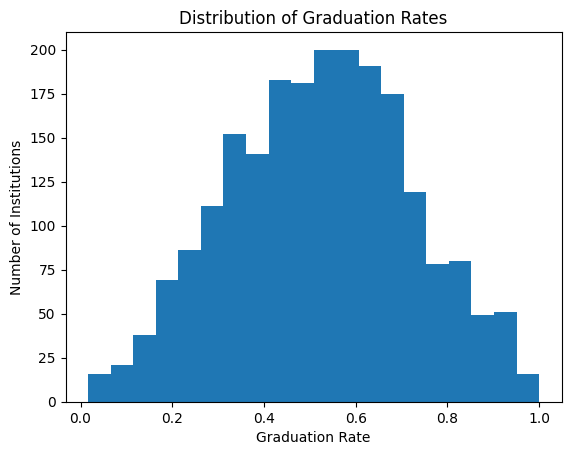

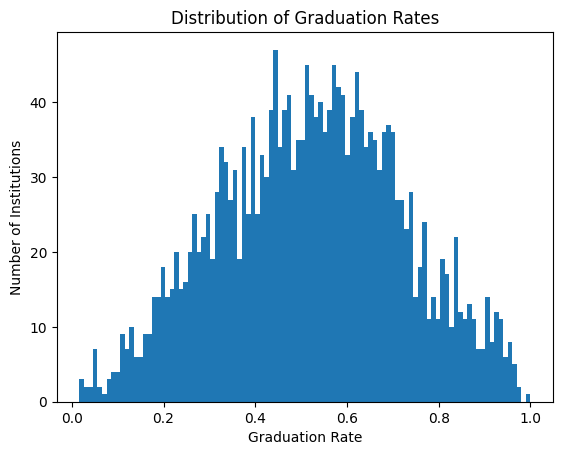

In [ ]:
# Simple histogram that shows number of schools by graduation rate to understand base distribution.
grad = pd.to_numeric(df_college_small['C150_4_POOLED_SUPP'], errors='coerce')
grad = grad.dropna()

plt.figure()
plt.hist(grad, bins=20)
plt.title("Distribution of Graduation Rates")
plt.xlabel("Graduation Rate")
plt.ylabel("Number of Institutions")

plt.figure()
plt.hist(grad, bins=100)
plt.title("Distribution of Graduation Rates")
plt.xlabel("Graduation Rate")
plt.ylabel("Number of Institutions")

print("Mean:", grad.mean())
print("Median:", grad.median())
print("Min:", grad.min())
print("Max:", grad.max())

#This distribution is largely normal with a slight left skew. Changing the bin width changes this graph quite a bit, 100 bins so rate by every percentage shows a lot more variance as you go percentage to percentage as shown. 

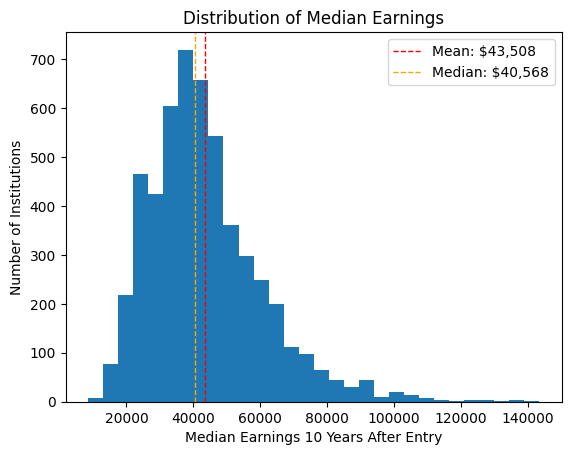

In [34]:
# Looking at earnings 10 years after graduation histogram by number of schools falling into that category.
earnings = pd.to_numeric(df_college_small['MD_EARN_WNE_P10'], errors='coerce')
earnings = earnings.dropna()

mean_val = earnings.mean()
median_val = earnings.median()

plt.figure()
plt.hist(earnings, bins=30)

plt.axvline(mean_val, linestyle='--', linewidth=1, color="red", label=f"Mean: ${mean_val:,.0f}")
plt.axvline(median_val, linestyle='--', linewidth=1, color="orange", label=f"Median: ${median_val:,.0f}")

plt.xlabel("Median Earnings 10 Years After Entry")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Median Earnings")

plt.legend()

# This distribution is skewed right. This makes sense as top institutions will likely produce very high earners. 
#It is also important to note that the mean is larger than the median likely due to these very large earnings numbers by a small select schools.

In [20]:
#Show correlation between variables with a correlation heatmap between variables.
numeric_df = df_college_small.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix

,CONTROL,ADM_RATE,COSTT4_A,MD_EARN_WNE_P10,UGDS,PCTPELL
CONTROL,1.000000,-0.080437,0.482202,-0.296812,-0.334054,0.446180
ADM_RATE,-0.080437,1.000000,-0.377644,-0.339231,-0.067143,0.190822
COSTT4_A,0.482202,-0.377644,1.000000,0.601684,-0.087206,-0.216793
MD_EARN_WNE_P10,-0.296812,-0.339231,0.601684,1.000000,0.251448,-0.480191
UGDS,-0.334054,-0.067143,-0.087206,0.251448,1.000000,-0.191766
PCTPELL,0.446180,0.190822,-0.216793,-0.480191,-0.191766,1.000000


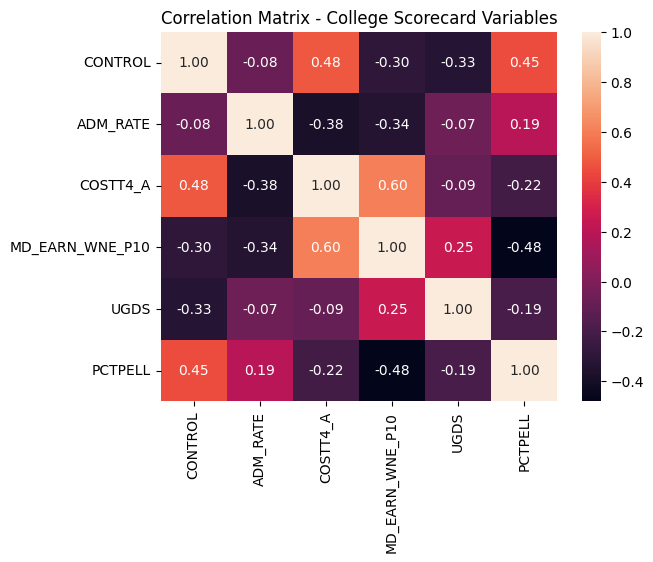

In [ ]:
# Highest positive correlation is between the cost of attendance "COSTT4_A" and median earnings 10 years after graduation "MD_EARN_WNE_P10".
    # This is not surprising as higher cost institutions tend to be those that create higher earners, whether that be from incoming status or the institution itself.
# Highest negative correlation is between the % of Pell Grant recipients "PCTPELL" and median earnings 10 years after graduation.
    # Also not surprising as this is the opposite effect, institutions serving lower income students have lower future earnings. 
plt.figure()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix - College Scorecard Variables")
plt.show()

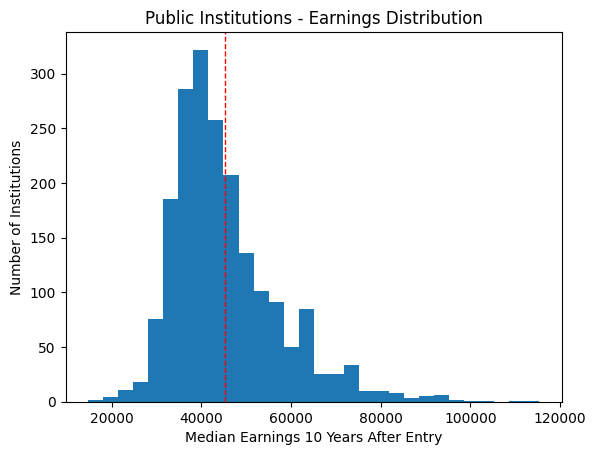

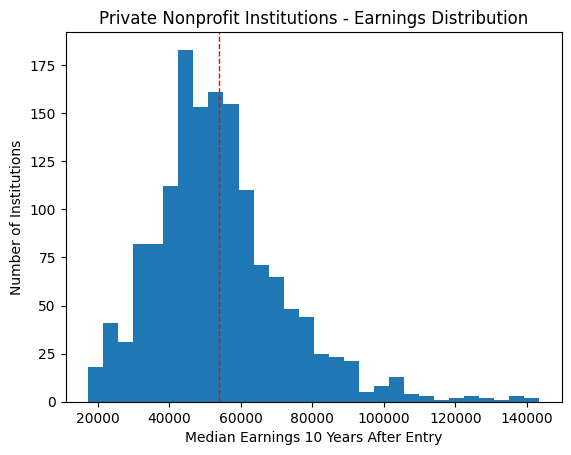

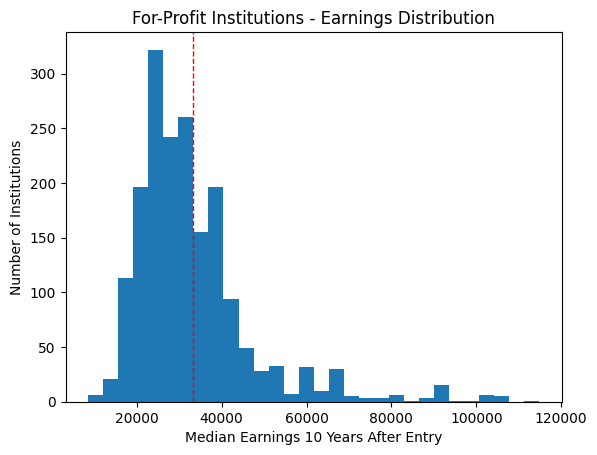

In [30]:
#Let's make 3 histograms between private, public and for profit institutions and earnings. 
public = df_college_small[df_college_small['CONTROL'] == 1]['MD_EARN_WNE_P10'].dropna()
private_np = df_college_small[df_college_small['CONTROL'] == 2]['MD_EARN_WNE_P10'].dropna()
for_profit = df_college_small[df_college_small['CONTROL'] == 3]['MD_EARN_WNE_P10'].dropna()

# Public
plt.figure()
plt.hist(public, bins=30)
plt.title("Public Institutions - Earnings Distribution")
plt.xlabel("Median Earnings 10 Years After Entry")
plt.ylabel("Number of Institutions")
plt.axvline(public.mean(), linestyle='--', linewidth=1, color="red", label="Public Mean")


# Private Nonprofit
plt.figure()
plt.hist(private_np, bins=30)
plt.title("Private Nonprofit Institutions - Earnings Distribution")
plt.xlabel("Median Earnings 10 Years After Entry")
plt.ylabel("Number of Institutions")
plt.axvline(private_np.mean(), linestyle='--', linewidth=1, color="red", label="Private NP Mean")


# For-Profit
plt.figure()
plt.hist(for_profit, bins=30)
plt.title("For-Profit Institutions - Earnings Distribution")
plt.xlabel("Median Earnings 10 Years After Entry")
plt.ylabel("Number of Institutions")
plt.axvline(for_profit.mean(), linestyle='--', linewidth=1, color="red", label="For-Profit Mean")

In [ ]:
#Private non-profit institutions have the highest mean of earnings as compared to the other two. For profit institutions have the lowest mean earnings of the three. 
# All three have a right skew, which makes sense as there is a hard lower limit for median earnings of 0, while there really is no upper bound, causing the right skew. 

Text(0, 0.5, 'Number of Institutions')

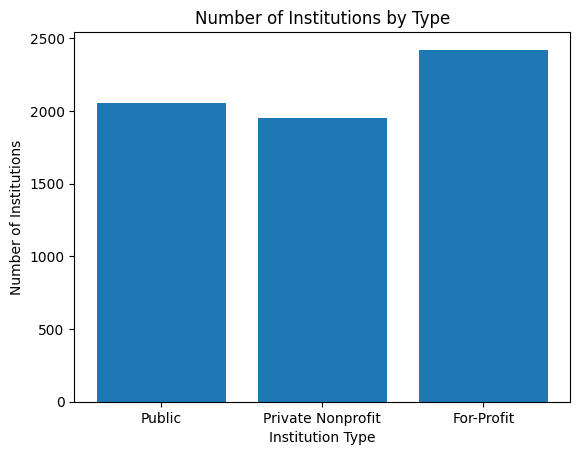

In [33]:
# The largest categorical variable for a bar plot is the institution type like those above.  
counts = df_college_small['CONTROL'].value_counts().sort_index()
counts

# As they are coded numerically lets assign labels to those as well.
labels = {
    1: "Public",
    2: "Private Nonprofit",
    3: "For-Profit"
}

counts.index = counts.index.map(labels)

# Plot.
plt.bar(counts.index, counts.values)

plt.title("Number of Institutions by Type")
plt.xlabel("Institution Type")
plt.ylabel("Number of Institutions")